In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import joblib
import numpy as np


np.random.seed(42)
X = np.random.rand(100, 1)
y = 3 * X.squeeze() + 2 + 0.1 * np.random.randn(100)


X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

modelo = LinearRegression()
modelo.fit(X_treino, y_treino)


previsoes = modelo.predict(X_teste)

erro_medio_quadratico = mean_squared_error(y_teste, previsoes)
print(f'Erro Médio Quadrático do modelo: {erro_medio_quadratico}')

joblib.dump(modelo, 'modelo_regressao_linear.joblib')


Erro Médio Quadrático do modelo: 0.006536995137169996


['modelo_regressao_linear.joblib']

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


R2 Score do Modelo Otimizado: nan


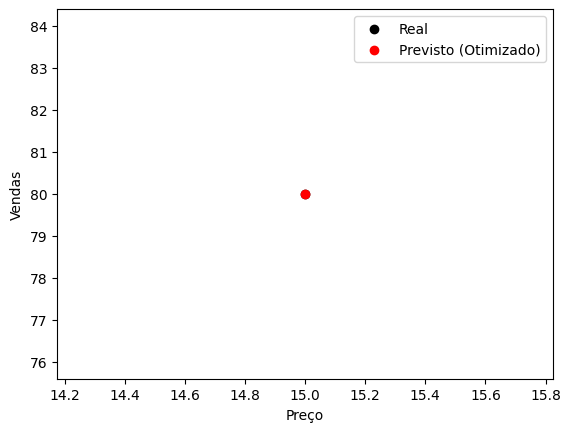

Importância das Features:
Preco: 1.4192580879686379e-15
Publicidade: 11.388041973930374


In [ ]:

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score


scaler = StandardScaler()
X_treino_normalizado = scaler.fit_transform(X_treino)
X_teste_normalizado = scaler.transform(X_teste)


modelo_otimizado = LinearRegression()
modelo_otimizado.fit(X_treino_normalizado, y_treino)


previsoes_otimizadas = modelo_otimizado.predict(X_teste_normalizado)

r2_score_otimizado = r2_score(y_teste, previsoes_otimizadas)
print(f'R2 Score do Modelo Otimizado: {r2_score_otimizado}')


plt.scatter(X_teste['Preco'], y_teste, color='black', label='Real')
plt.scatter(X_teste['Preco'], previsoes_otimizadas, color='red', label='Previsto (Otimizado)')
plt.xlabel('Preço')
plt.ylabel('Vendas')
plt.legend()
plt.show()


importancia_features = modelo_otimizado.coef_
print('Importância das Features:')
for i, feature in enumerate(['Preco', 'Publicidade']):
    print(f'{feature}: {importancia_features[i]}')


In [ ]:
!pip install mlflow flask


In [ ]:
import mlflow
import mlflow.sklearn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from flask import Flask, jsonify, request


In [ ]:
dados = pd.DataFrame({
    'Publicidade': [50, 30, 20, 40, 45],
    'Vendas': [100, 80, 70, 90, 95]
})

X = dados[['Publicidade']]
y = dados['Vendas']


In [ ]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:

mlflow.start_run()


modelo = LinearRegression()
modelo.fit(X_treino, y_treino)




LinearRegression()

In [ ]:
previsoes = modelo.predict(X_teste)




In [ ]:
erro_medio_quadratico = mean_squared_error(y_teste, previsoes)


mlflow.log_param("modelo", "regressao_linear")
mlflow.log_metric("mean_squared_error", erro_medio_quadratico)
mlflow.sklearn.log_model(modelo, "model")


mlflow.end_run()
